In [1]:
import os
os.chdir('c:\\Users\\wallj\\DS_Projects\\Portfolio_Projects\\macro_mlops')
import pandas as pd
from src.ingestion.fetch_data import fetch_fred
from src.features.make_features import make_features

In [2]:
# This is how you grab data from the FRED API using our .py script
fred_cols = {
    "cpi": "CPIAUCSL",  # Consumer Price Index for All Urban Consumers: All Items
    "unemployment_rate": "UNRATE",  # Unemployment Rate
    "interest_rate": "FEDFUNDS",  # Effective Federal Funds Rate
    "oil_price": "WTISPLC",  # Crude Oil Prices: West Texas Intermediate (WTI)WTI Spot Oil Price
    "gdp": "GDP",  # Gross Domestic Product (quarterly)
    "m2_money": "M2SL",  # M2 Money Stock
}
df_raw = fetch_fred(fred_cols)

df_raw.tail()

Fetching cpi data from FRED...
Fetching unemployment_rate data from FRED...
Fetching interest_rate data from FRED...
Fetching oil_price data from FRED...
Fetching gdp data from FRED...
Fetching m2_money data from FRED...


,cpi,unemployment_rate,interest_rate,oil_price,gdp,m2_money
date,,,,,,
2025-08-01,323.364,4.3,4.33,64.86,NaN,22108.2
2025-09-01,324.368,4.4,4.22,63.96,NaN,22211.9
2025-10-01,NaN,NaN,4.09,60.89,NaN,22297.8
2025-11-01,325.031,4.5,3.88,60.06,NaN,22322.1
2025-12-01,326.030,4.4,3.72,57.97,NaN,22411.0


In [3]:
df_raw.corr()

,cpi,unemployment_rate,interest_rate,oil_price,gdp,m2_money
cpi,1.000000,-0.247581,0.038240,0.410717,0.993884,0.970974
unemployment_rate,-0.247581,1.000000,-0.602904,0.175100,-0.289860,-0.277204
interest_rate,0.038240,-0.602904,1.000000,-0.153551,0.065003,0.005564
oil_price,0.410717,0.175100,-0.153551,1.000000,0.367928,0.288663
gdp,0.993884,-0.289860,0.065003,0.367928,1.000000,0.978952
m2_money,0.970974,-0.277204,0.005564,0.288663,0.978952,1.000000


In [4]:
df_processed = make_features(return_df=True)
df_processed.head()

✅ Features saved to data/processed/fred_data.csv
            cpi_target  cpi_lag1  unemployment_rate_lag1  interest_rate_lag1  \
date                                                                           
2000-02-01       171.0     169.3                     4.0                5.45   
2000-03-01       170.9     170.0                     4.1                5.73   
2000-04-01       171.2     171.0                     4.0                5.85   
2000-05-01       172.2     170.9                     3.8                6.02   
2000-06-01       172.7     171.2                     4.0                6.27   

            oil_price_lag1   gdp_lag1  m2_money_lag1  
date                                                  
2000-02-01           27.18  10002.179         4667.6  
2000-03-01           29.35  10002.179         4680.9  
2000-04-01           29.89  10002.179         4711.7  
2000-05-01           25.74  10247.720         4767.8  
2000-06-01           28.78  10247.720         4755.7  


,cpi_target,cpi_lag1,unemployment_rate_lag1,interest_rate_lag1,oil_price_lag1,gdp_lag1,m2_money_lag1
date,,,,,,,
2000-02-01,171.0,169.3,4.0,5.45,27.18,10002.179,4667.6
2000-03-01,170.9,170.0,4.1,5.73,29.35,10002.179,4680.9
2000-04-01,171.2,171.0,4.0,5.85,29.89,10002.179,4711.7
2000-05-01,172.2,170.9,3.8,6.02,25.74,10247.720,4767.8
2000-06-01,172.7,171.2,4.0,6.27,28.78,10247.720,4755.7


In [5]:
df_processed.corr()

,cpi_target,cpi_lag1,unemployment_rate_lag1,interest_rate_lag1,oil_price_lag1,gdp_lag1,m2_money_lag1
cpi_target,1.000000,0.999548,-0.238869,0.010987,0.426025,0.994504,0.972636
cpi_lag1,0.999548,1.000000,-0.237407,0.009528,0.427205,0.994041,0.970100
unemployment_rate_lag1,-0.238869,-0.237407,1.000000,-0.600097,0.174940,-0.315982,-0.268456
interest_rate_lag1,0.010987,0.009528,-0.600097,1.000000,-0.153587,0.067155,-0.026104
oil_price_lag1,0.426025,0.427205,0.174940,-0.153587,1.000000,0.357911,0.300162
gdp_lag1,0.994504,0.994041,-0.315982,0.067155,0.357911,1.000000,0.977812
m2_money_lag1,0.972636,0.970100,-0.268456,-0.026104,0.300162,0.977812,1.000000


<Axes: xlabel='date'>

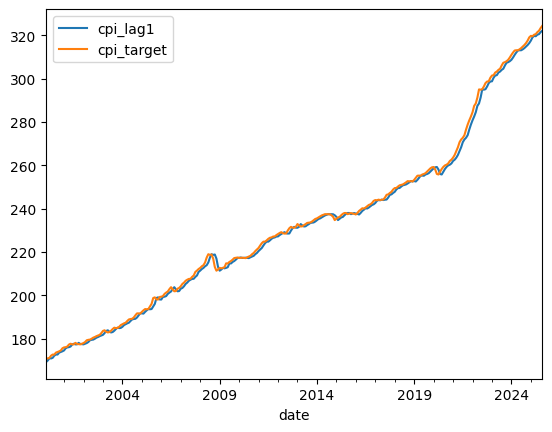

In [6]:
df_processed[["cpi_lag1", "cpi_target"]].plot()